## House Price Prediction in Germany 

The data was scraped using R from immoscout24.de

## 1.Loading libraries and Dataset

#### Importing (basic) libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('immo_data.csv')

## 2. Data Inspection & Cleaning

In [92]:
# Overview
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [93]:
# number of data points
df.shape

(268850, 49)

In [94]:
# statistical description
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [95]:
# Renaming columns
df.rename(columns = {"regio1": "state", "regio2": "city", "regio3": "local_district"}, inplace = True)

# Sorting data
df = df.sort_values(by = ["state", "city", "local_district"]).reset_index(drop = True)

In [96]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   state                     268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [97]:
#Null Values
df.isnull().sum()

state                            0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [98]:
#delete columns with more than 50% missing data
df.isna().sum()/len(df)

state                       0.000000
serviceCharge               0.025698
heatingType                 0.166844
telekomTvOffer              0.121328
telekomHybridUploadSpeed    0.832546
newlyConst                  0.000000
balcony                     0.000000
picturecount                0.000000
pricetrend                  0.006814
telekomUploadSpeed          0.124077
totalRent                   0.150705
yearConstructed             0.212182
scoutId                     0.000000
noParkSpaces                0.653889
firingTypes                 0.211880
hasKitchen                  0.000000
geo_bln                     0.000000
cellar                      0.000000
yearConstructedRange        0.212182
baseRent                    0.000000
houseNumber                 0.264155
livingSpace                 0.000000
geo_krs                     0.000000
condition                   0.254748
interiorQual                0.419063
petsAllowed                 0.426160
street                      0.000000
s

In [99]:
df.columns[((df.isna().sum()/len(df)) > 0.50)]

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [100]:
df = df.drop(columns=df.columns[((df.isna().sum()/len(df)) > 0.50)])
df.columns

Index(['state', 'serviceCharge', 'heatingType', 'telekomTvOffer', 'newlyConst',
       'balcony', 'picturecount', 'pricetrend', 'telekomUploadSpeed',
       'totalRent', 'yearConstructed', 'scoutId', 'firingTypes', 'hasKitchen',
       'geo_bln', 'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'city', 'local_district',
       'description', 'facilities', 'date'],
      dtype='object')

In [101]:
#drop inappropriate values
df[df['livingSpace'] == 0.0].shape[0]

75

In [102]:
df[df['livingSpace'] == 0.0].index

Int64Index([  5600,   5607,   5809,   5821,   5823,   5828,   5831,   5838,
              5847,   5852,   5872,   5875,   7163,   8897,   9353,   9967,
             11106,  12338,  12372,  12776,  15631,  16897,  16937,  17106,
             19261,  19932,  19936,  19954,  20065,  21721,  25587,  34253,
             34506,  34722,  34864,  35860,  50984,  53329,  64241,  68600,
             72169,  74030,  81607,  88677,  92689,  94637, 101969, 115292,
            115340, 135514, 135940, 139527, 142697, 147732, 147993, 149907,
            150611, 155274, 159219, 174314, 185432, 187796, 217957, 220619,
            220656, 221019, 227962, 227966, 238367, 248306, 250845, 250953,
            250968, 258413, 259031],
           dtype='int64')

In [103]:
df = df.drop(df[df['livingSpace'] == 0.0].index)
df.shape

(268775, 42)

In [104]:
df[df['totalRent'] == 0.0].shape[0]

231

In [105]:
df = df.drop(df[df['totalRent'] == 0.0].index)
df.shape

(268544, 42)

In [106]:
df.shape

(268544, 42)

In [107]:
df = df[df.baseRent.between(100,10000, inclusive=True)] #drop extreme rent values
df = df[df.livingSpace.between(10, 500, inclusive=True)] #drop extreme and wrongly coded values
df = df[df.noRooms.between(0,15, inclusive=True)] #drop extreme and probably wrongly coded value
df = df[np.isfinite(df['totalRent'])] #drop observations where totalRent isn't available
df = df[df.totalRent.between(100,10000, inclusive=True)] #drop extreme totalRent value

In [108]:
#remove unnecessary columns
df = df.drop(columns=[
"telekomTvOffer",
"picturecount",
"pricetrend",
"telekomUploadSpeed",
"scoutId",
"geo_bln",
"yearConstructedRange",
"street",
"streetPlain",
"houseNumber",
"date",
"baseRentRange",
"geo_plz",
"noRoomsRange",
"facilities",
"description",
"petsAllowed",
"livingSpaceRange"])

In [109]:
df.shape

(227779, 24)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227779 entries, 0 to 268849
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   state            227779 non-null  object 
 1   serviceCharge    223767 non-null  float64
 2   heatingType      191041 non-null  object 
 3   newlyConst       227779 non-null  bool   
 4   balcony          227779 non-null  bool   
 5   totalRent        227779 non-null  float64
 6   yearConstructed  178647 non-null  float64
 7   firingTypes      179502 non-null  object 
 8   hasKitchen       227779 non-null  bool   
 9   cellar           227779 non-null  bool   
 10  baseRent         227779 non-null  float64
 11  livingSpace      227779 non-null  float64
 12  geo_krs          227779 non-null  object 
 13  condition        171033 non-null  object 
 14  interiorQual     139171 non-null  object 
 15  lift             227779 non-null  bool   
 16  typeOfFlat       197288 non-null  obje

In [111]:
#find mean values to fill for missing data
df._get_numeric_data().mean()

serviceCharge       151.319066
newlyConst            0.076241
balcony               0.619025
totalRent           813.718252
yearConstructed    1965.711151
hasKitchen            0.349712
cellar                0.646996
baseRent            643.240031
livingSpace          72.804072
lift                  0.238108
noRooms               2.611629
thermalChar         113.892343
floor                 2.132310
numberOfFloors        3.579361
garden                0.202192
dtype: float64

In [112]:
df.fillna(df._get_numeric_data().mean(),inplace = True)

In [113]:
df.isna().sum()

state                  0
serviceCharge          0
heatingType        36738
newlyConst             0
balcony                0
totalRent              0
yearConstructed        0
firingTypes        48277
hasKitchen             0
cellar                 0
baseRent               0
livingSpace            0
geo_krs                0
condition          56746
interiorQual       88608
lift                   0
typeOfFlat         30491
noRooms                0
thermalChar            0
floor                  0
numberOfFloors         0
garden                 0
city                   0
local_district         0
dtype: int64

In [114]:
df.dropna(inplace=True)

In [115]:
df.isna().sum()

state              0
serviceCharge      0
heatingType        0
newlyConst         0
balcony            0
totalRent          0
yearConstructed    0
firingTypes        0
hasKitchen         0
cellar             0
baseRent           0
livingSpace        0
geo_krs            0
condition          0
interiorQual       0
lift               0
typeOfFlat         0
noRooms            0
thermalChar        0
floor              0
numberOfFloors     0
garden             0
city               0
local_district     0
dtype: int64

In [116]:
df.shape

(94816, 24)

In [117]:
df = df.drop(columns=['firingTypes', "local_district"])
df = df.drop(columns=["numberOfFloors"])
df = df.drop(columns=["geo_krs"])
df = df.drop(columns=["city"])

In [118]:
df.head()

,state,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,condition,interiorQual,lift,typeOfFlat,noRooms,thermalChar,floor,garden
1,Baden_Württemberg,170.0,central_heating,False,True,750.0,1996.000000,False,True,580.0,82.0,well_kept,sophisticated,False,apartment,3.0,93.000000,1.0,False
3,Baden_Württemberg,130.0,central_heating,False,True,450.0,1965.711151,True,True,335.0,35.0,well_kept,normal,False,ground_floor,1.0,132.000000,0.0,False
4,Baden_Württemberg,200.0,floor_heating,False,True,1300.0,2012.000000,True,True,1100.0,139.0,mint_condition,sophisticated,True,ground_floor,6.0,113.892343,0.0,True
5,Baden_Württemberg,100.0,floor_heating,False,True,610.0,2012.000000,False,True,510.0,64.0,mint_condition,sophisticated,True,apartment,2.5,113.892343,2.0,False
11,Baden_Württemberg,100.0,central_heating,False,True,1390.0,1700.000000,True,False,1190.0,170.0,well_kept,normal,False,apartment,5.0,113.892343,1.0,False


In [119]:
df.shape

(94816, 19)

## 3. Exploratory Data Anaylsis (EDA)

### Numerical Data Analysis

In [120]:
numeric_data=df.select_dtypes(include=[np.number])
numeric_data.describe()

,serviceCharge,totalRent,yearConstructed,baseRent,livingSpace,noRooms,thermalChar,floor
count,94816.000000,94816.000000,94816.000000,94816.000000,94816.000000,94816.000000,94816.000000,94816.000000
mean,160.131535,876.608230,1967.929370,698.179663,77.035342,2.690365,112.836419,1.996015
std,488.683320,557.702928,42.368093,492.320930,32.304971,0.991984,45.097479,1.471543
min,0.000000,100.000000,1000.000000,100.000000,10.000000,1.000000,0.200000,-1.000000
25%,100.000000,500.000000,1956.000000,365.000000,56.017500,2.000000,97.000000,1.000000
50%,147.000000,721.160000,1968.000000,558.000000,71.000000,3.000000,113.892343,2.000000
75%,200.000000,1080.000000,1996.000000,880.000000,92.000000,3.000000,117.000000,3.000000
max,146118.000000,8780.000000,2022.000000,8700.000000,480.000000,15.000000,1745.000000,32.000000


<AxesSubplot:>

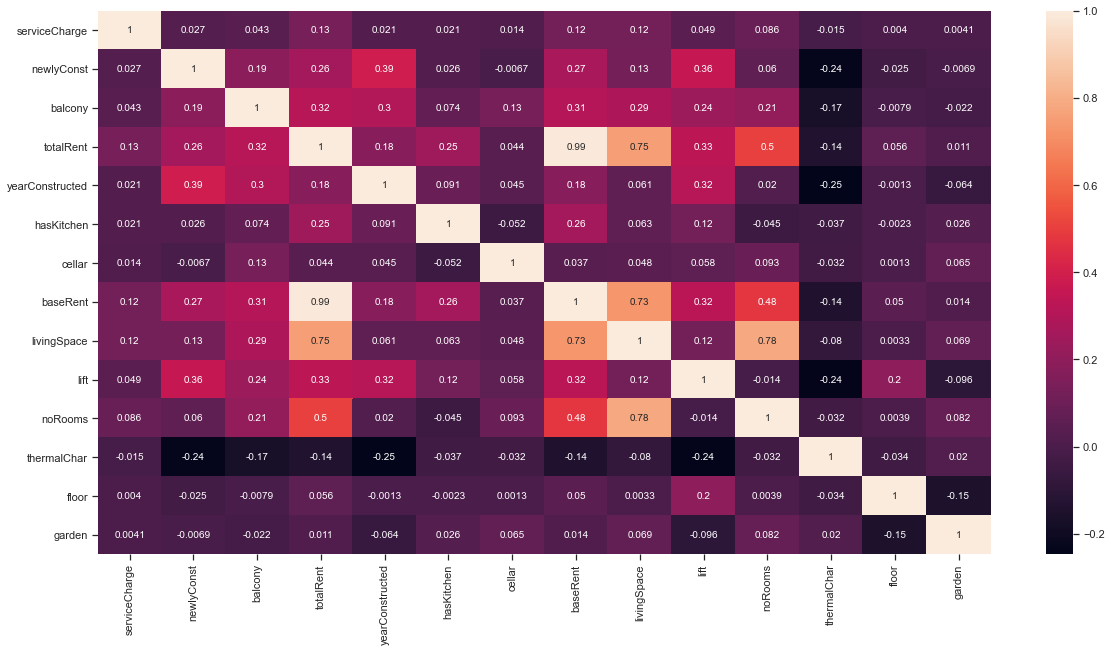

In [121]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr,annot=True)

In [122]:
#numeric correlation
corr['totalRent'].sort_values(ascending=False)

totalRent          1.000000
baseRent           0.991606
livingSpace        0.753816
noRooms            0.503626
lift               0.333345
balcony            0.315067
newlyConst         0.263981
hasKitchen         0.248141
yearConstructed    0.178612
serviceCharge      0.128920
floor              0.055543
cellar             0.044030
garden             0.011350
thermalChar       -0.138375
Name: totalRent, dtype: float64

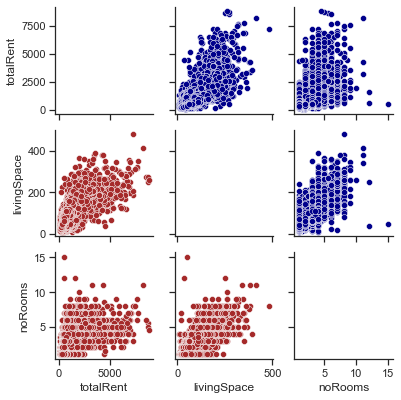

In [123]:
import seaborn as sns
sns.set(style="ticks")

g = sns.PairGrid(df[['totalRent','livingSpace','noRooms']], height=1.9, aspect=1)
g.map_upper(sns.scatterplot,color='darkblue')
g.map_lower(sns.scatterplot, color='brown')

Text(0, 0.5, 'Count')

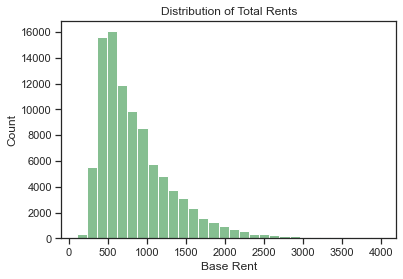

In [124]:
df['totalRent'].hist(bins=30, range=(100,4000), grid=False, color='#86bf91')
plt.title('Distribution of Total Rents')
plt.xlabel('Base Rent')
plt.ylabel('Count')

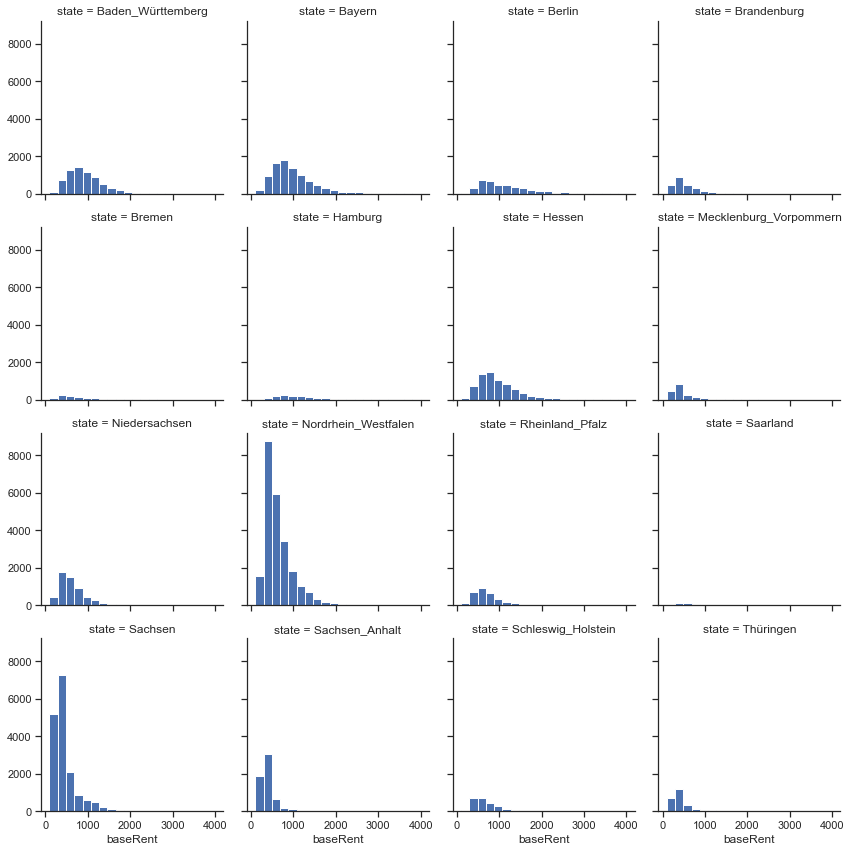

In [125]:
df['state'].value_counts()

g = sns.FacetGrid(df, col='state', col_wrap=4)
g = g.map(plt.hist, 'baseRent', bins=20, range=(100,4000))

In [126]:
df.groupby(['state'])['totalRent'].mean()

state
Baden_Württemberg         1125.953010
Bayern                    1199.331096
Berlin                    1454.239169
Brandenburg                731.244584
Bremen                     901.667733
Hamburg                   1418.846094
Hessen                    1209.874423
Mecklenburg_Vorpommern     606.544674
Niedersachsen              799.490854
Nordrhein_Westfalen        822.294310
Rheinland_Pfalz            877.394276
Saarland                   755.074177
Sachsen                    608.738927
Sachsen_Anhalt             538.382552
Schleswig_Holstein         841.607845
Thüringen                  552.984925
Name: totalRent, dtype: float64

Text(0, 0.5, 'Price')

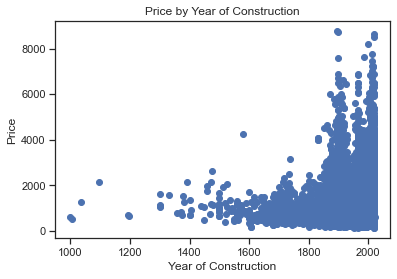

In [127]:
plt.scatter(x='yearConstructed', y='totalRent', data=df)
plt.title('Price by Year of Construction')
plt.xlabel('Year of Construction')
plt.ylabel('Price')

<AxesSubplot:xlabel='livingSpace', ylabel='totalRent'>

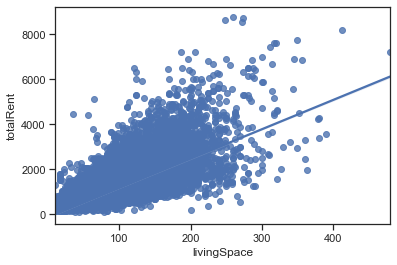

In [128]:
sns.regplot(x='livingSpace', y='totalRent', data=df)

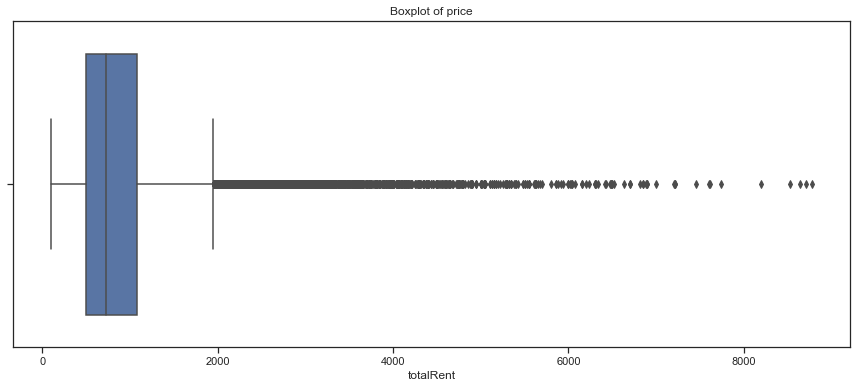

In [129]:
plt.figure(figsize=(15,6))

sns.boxplot(x='totalRent', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of price')
plt.show()

<AxesSubplot:xlabel='totalRent', ylabel='Density'>

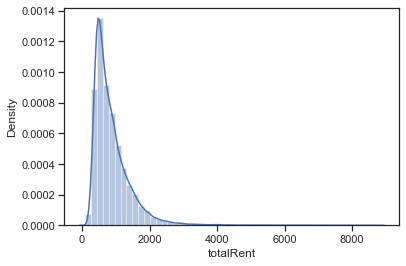

In [130]:
sns.distplot(df['totalRent'])

<AxesSubplot:xlabel='totalRent', ylabel='Density'>

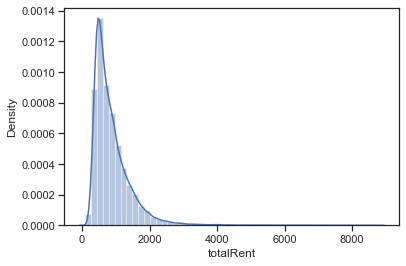

In [131]:
sns.distplot(df['totalRent'])

In [132]:
df['totalRent'].skew()

2.7310114076820695

<AxesSubplot:xlabel='livingSpace', ylabel='totalRent'>

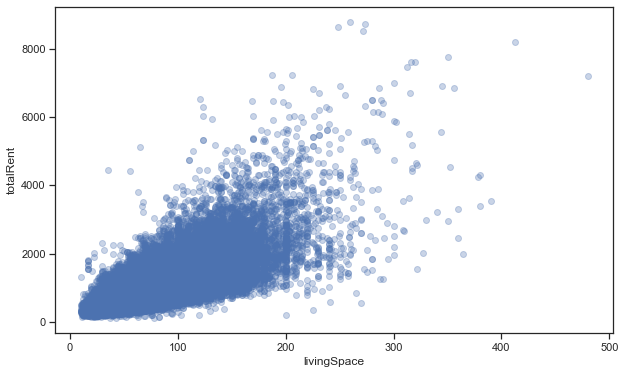

In [133]:
plt.figure(figsize=(10,6))
sns.regplot(x='livingSpace', y='totalRent', data=df, fit_reg=False, scatter_kws={'alpha':0.3})

<AxesSubplot:xlabel='noRooms', ylabel='totalRent'>

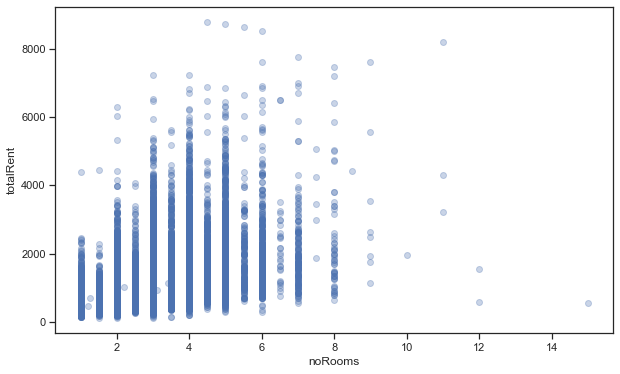

In [134]:
plt.figure(figsize=(10,6))
sns.regplot(x='noRooms', y='totalRent', data=df, fit_reg=False, scatter_kws={'alpha':0.3})

### Categorial Data Analysis

In [135]:
cat_data=df.select_dtypes(exclude=[np.number])
cat_data.describe()

,state,heatingType,newlyConst,balcony,hasKitchen,cellar,condition,interiorQual,lift,typeOfFlat,garden
count,94816,94816,94816,94816,94816,94816,94816,94816,94816,94816,94816
unique,16,13,2,2,2,2,10,4,2,10,2
top,Nordrhein_Westfalen,central_heating,False,True,False,True,well_kept,normal,False,apartment,False
freq,24123,50618,85750,62849,54908,69833,31429,48753,70442,50719,69710


In [136]:
df['state'].unique()

array(['Baden_Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg_Vorpommern', 'Niedersachsen',
       'Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Saarland', 'Sachsen',
       'Sachsen_Anhalt', 'Schleswig_Holstein', 'Thüringen'], dtype=object)

In [137]:
df['heatingType'].unique()

array(['central_heating', 'floor_heating', 'gas_heating', 'oil_heating',
       'night_storage_heater', 'combined_heat_and_power_plant',
       'wood_pellet_heating', 'self_contained_central_heating',
       'heat_pump', 'district_heating', 'electric_heating',
       'solar_heating', 'stove_heating'], dtype=object)

In [138]:
df['condition'].unique()

array(['well_kept', 'mint_condition', 'refurbished', 'modernized',
       'fully_renovated', 'first_time_use', 'negotiable',
       'first_time_use_after_refurbishment', 'need_of_renovation',
       'ripe_for_demolition'], dtype=object)

In [139]:
df['interiorQual'].unique()

array(['sophisticated', 'normal', 'luxury', 'simple'], dtype=object)

In [140]:
df['typeOfFlat'].unique()

array(['apartment', 'ground_floor', 'roof_storey', 'raised_ground_floor',
       'terraced_flat', 'maisonette', 'other', 'half_basement',
       'penthouse', 'loft'], dtype=object)

<AxesSubplot:xlabel='state', ylabel='count'>

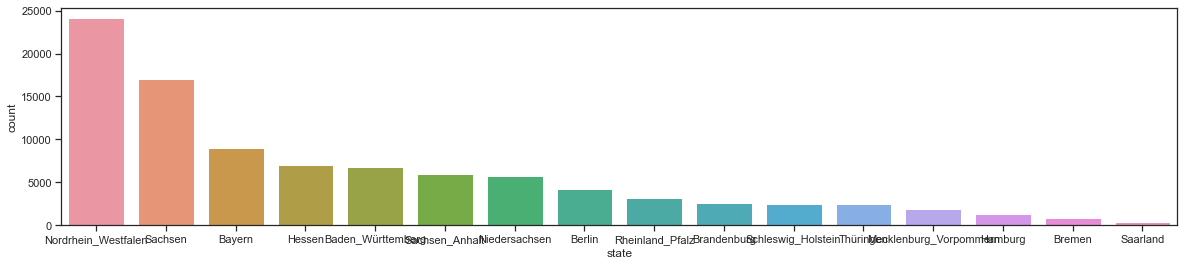

In [141]:
plt.figure(figsize=(20, 4))
sns.countplot(data = df, x = 'state', order=df.state.value_counts().index)

<AxesSubplot:xlabel='heatingType', ylabel='count'>

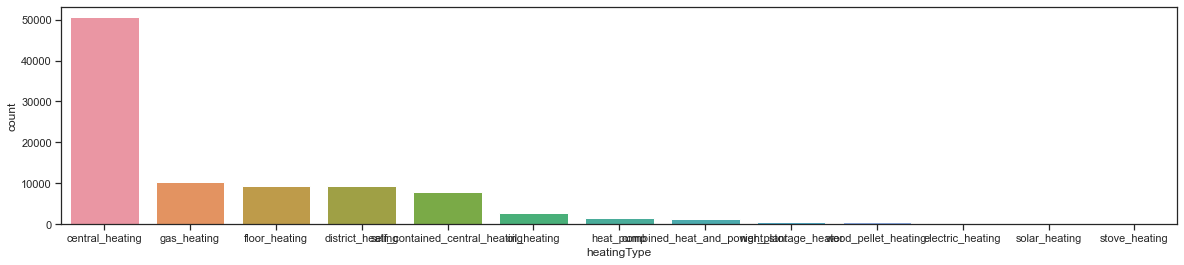

In [142]:
plt.figure(figsize=(20, 4))
sns.countplot(data = df, x = 'heatingType', order=df.heatingType.value_counts().index)

<AxesSubplot:xlabel='condition', ylabel='count'>

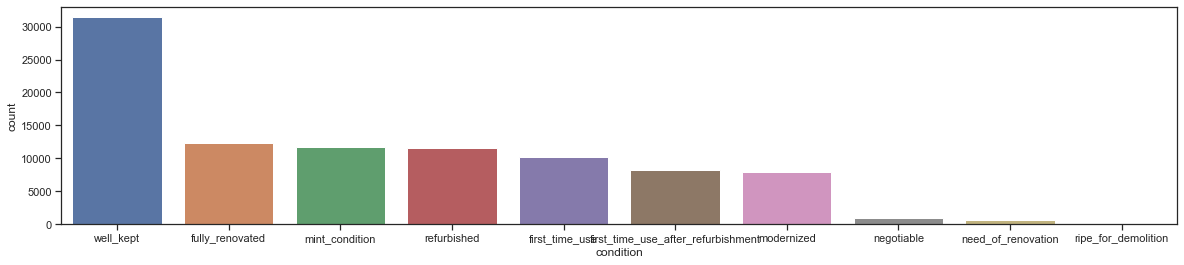

In [143]:
plt.figure(figsize=(20, 4))
sns.countplot(data = df, x = 'condition', order=df.condition.value_counts().index)

<AxesSubplot:xlabel='interiorQual', ylabel='count'>

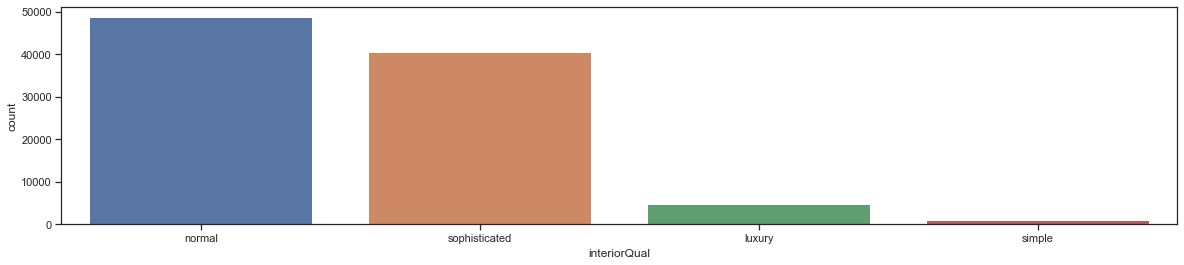

In [144]:
plt.figure(figsize=(20, 4))
sns.countplot(data = df, x = 'interiorQual', order=df.interiorQual.value_counts().index)

<AxesSubplot:xlabel='typeOfFlat', ylabel='count'>

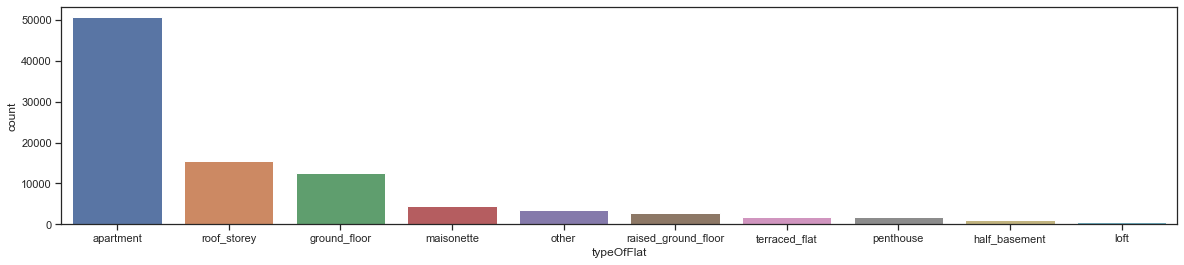

In [145]:
plt.figure(figsize=(20, 4))
sns.countplot(data = df, x = 'typeOfFlat', order=df.typeOfFlat.value_counts().index)

In [146]:
pivot=df.pivot_table(index='typeOfFlat', values='totalRent', aggfunc=np.median)
pivot

,totalRent
typeOfFlat,
apartment,698.0
ground_floor,710.0
half_basement,600.0
loft,1320.0
maisonette,1140.0
other,651.0
penthouse,1600.0
raised_ground_floor,682.0
roof_storey,653.0


<AxesSubplot:xlabel='typeOfFlat'>

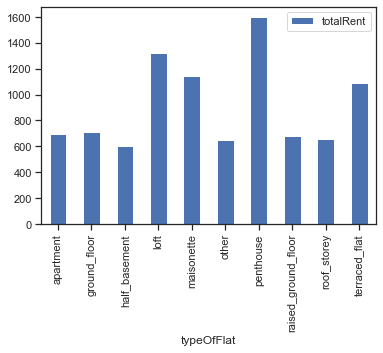

In [147]:
pivot.plot(kind='bar')

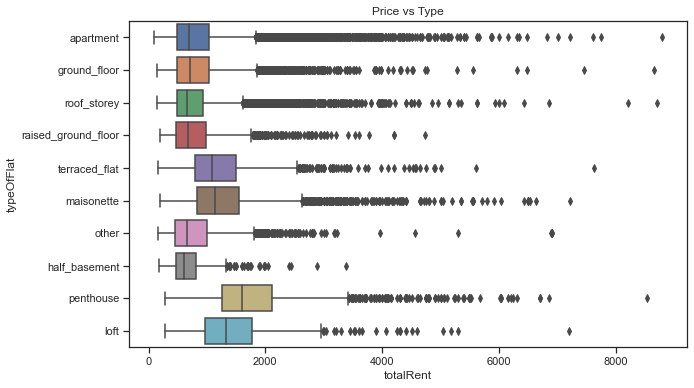

In [148]:
plt.figure(figsize=(10,6))
sns.boxplot(x='totalRent', y='typeOfFlat', data=df)
plt.title('Price vs Type')
plt.show()

In [149]:
pivot=df.pivot_table(index='condition', values='totalRent', aggfunc=np.median)
pivot

,totalRent
condition,
first_time_use,1230.0
first_time_use_after_refurbishment,850.0
fully_renovated,650.0
mint_condition,1025.0
modernized,660.0
need_of_renovation,555.0
negotiable,581.5
refurbished,544.0
ripe_for_demolition,975.0


<AxesSubplot:xlabel='condition'>

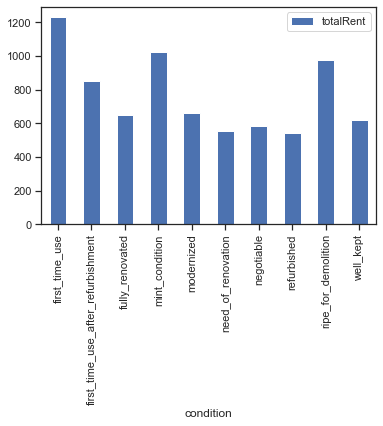

In [150]:
pivot.plot(kind='bar')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94816 entries, 1 to 268849
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            94816 non-null  object 
 1   serviceCharge    94816 non-null  float64
 2   heatingType      94816 non-null  object 
 3   newlyConst       94816 non-null  bool   
 4   balcony          94816 non-null  bool   
 5   totalRent        94816 non-null  float64
 6   yearConstructed  94816 non-null  float64
 7   hasKitchen       94816 non-null  bool   
 8   cellar           94816 non-null  bool   
 9   baseRent         94816 non-null  float64
 10  livingSpace      94816 non-null  float64
 11  condition        94816 non-null  object 
 12  interiorQual     94816 non-null  object 
 13  lift             94816 non-null  bool   
 14  typeOfFlat       94816 non-null  object 
 15  noRooms          94816 non-null  float64
 16  thermalChar      94816 non-null  float64
 17  floor      

### Data Pre-Processing

In [63]:
numeric_data.columns

Index(['serviceCharge', 'totalRent', 'yearConstructed', 'baseRent',
       'livingSpace', 'noRooms', 'thermalChar', 'floor'],
      dtype='object')

In [152]:
df_scaled = df[["serviceCharge",
"totalRent",
"yearConstructed",
"baseRent",
"livingSpace",
"thermalChar"]]

In [154]:
df_scaled.columns

Index(['serviceCharge', 'totalRent', 'yearConstructed', 'baseRent',
       'livingSpace', 'thermalChar'],
      dtype='object')

In [155]:
scaler = StandardScaler()
scaler.fit(df[df_scaled.columns])
scaled = scaler.transform(df[df_scaled.columns])

for i, col in enumerate(df_scaled.columns):
       df[col] = scaled[:,i]

In [156]:
df.columns

Index(['state', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'totalRent', 'yearConstructed', 'hasKitchen', 'cellar', 'baseRent',
       'livingSpace', 'condition', 'interiorQual', 'lift', 'typeOfFlat',
       'noRooms', 'thermalChar', 'floor', 'garden'],
      dtype='object')

In [157]:
df["state"] = df["state"].astype("category")
df["heatingType"] = df["heatingType"].astype("category")
df["condition"] = df["condition"].astype("category")
df["interiorQual"] = df["interiorQual"].astype("category")
df["typeOfFlat"] = df["typeOfFlat"].astype("category")

In [158]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['state', 'heatingType', 'condition', 'interiorQual', 'typeOfFlat'], dtype='object')

In [159]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [160]:
df.shape

(94816, 19)

In [161]:
print(df.columns.tolist())

['state', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony', 'totalRent', 'yearConstructed', 'hasKitchen', 'cellar', 'baseRent', 'livingSpace', 'condition', 'interiorQual', 'lift', 'typeOfFlat', 'noRooms', 'thermalChar', 'floor', 'garden']


In [162]:
df.head()

,state,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,condition,interiorQual,lift,typeOfFlat,noRooms,thermalChar,floor,garden
1,0,0.020194,0,False,True,-0.227019,0.662545,False,True,-0.240047,0.153682,9,3,False,0,3.0,-0.439859,1.0,False
3,0,-0.061659,0,False,True,-0.764942,-0.052356,True,True,-0.737693,-1.301210,9,1,False,1,1.0,0.424939,0.0,False
4,0,0.081584,4,False,True,0.759175,1.040190,True,True,0.816180,1.918125,3,3,True,1,6.0,0.023414,0.0,True
5,0,-0.123049,4,False,True,-0.478050,1.040190,False,True,-0.382232,-0.403511,3,3,True,0,2.5,0.023414,2.0,False
11,0,-0.123049,0,False,True,0.920552,-6.323881,True,False,0.998988,2.877735,9,1,False,0,5.0,0.023414,1.0,False


## Modelling

In [192]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf

In [164]:
# RMSE
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [193]:
y = df["totalRent"]
x = df.drop("totalRent", axis=1)

In [168]:
x.shape , y.shape

((94816, 18), (94816,))

In [199]:
x_train ,x_test, y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state =42)

In [200]:
x_train.shape , y_train.shape

((66371, 18), (66371,))

In [201]:
x_test.shape , y_test.shape

((28445, 18), (28445,))

In [202]:
Reg = LinearRegression()
Reg.fit(x_train, y_train)
y_pred_lin = Reg.predict(x_test)
rmse(y_test,y_pred_lin)

0.11103727

In [174]:
rf_regr = RandomForestRegressor()
rf_regr.fit(x_train, y_train)
y_pred_rf = rf_regr.predict(x_test)
rmse(y_test,y_pred_rf)

0.08767163017585602

In [175]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(x_test)

-0.0233738263959999
[ 9.58387626e-04  5.28372383e-03 -7.56621045e-03 -1.56797001e-02
  6.49383389e-03  5.12417685e-03 -6.47171923e-03  8.16327653e-03
  9.39766152e-01  6.36186106e-02  7.12545091e-04 -2.51304419e-03
  4.99746405e-02 -7.59819084e-04  6.19763679e-03  4.44160926e-03
  1.31423833e-03 -6.30481922e-03]


## Keras NN Model

In [189]:
x = np.asarray(x).astype('float32')
y = np.asarray(y).astype('float32')

In [ ]:
#x_train=np.asarray(x_train).astype(np.int)
#y_train=np.asarray(y_train).astype(np.int)

In [203]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [204]:
model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                190       
_________________________________________________________________
dense_13 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_14 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 41        
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


In [205]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=32)

Epoch 1/150
2075/2075 [==============================] - 2s 720us/step - loss: 0.2532 - mean_absolute_error: 0.2517 - val_loss: 0.0123 - val_mean_absolute_error: 0.0663
Epoch 2/150
2075/2075 [==============================] - 1s 565us/step - loss: 0.0827 - mean_absolute_error: 0.0736 - val_loss: 0.0141 - val_mean_absolute_error: 0.0614
Epoch 3/150
2075/2075 [==============================] - 1s 588us/step - loss: 0.3870 - mean_absolute_error: 0.0909 - val_loss: 0.0089 - val_mean_absolute_error: 0.0544
Epoch 4/150
2075/2075 [==============================] - 1s 583us/step - loss: 0.0209 - mean_absolute_error: 0.0600 - val_loss: 0.0162 - val_mean_absolute_error: 0.0631
Epoch 5/150
2075/2075 [==============================] - 1s 571us/step - loss: 0.0668 - mean_absolute_error: 0.0642 - val_loss: 0.0093 - val_mean_absolute_error: 0.0559
Epoch 6/150
2075/2075 [==============================] - 1s 566us/step - loss: 0.0150 - mean_absolute_error: 0.0587 - val_loss: 0.0090 - val_mean_absolute_

2075/2075 [==============================] - 1s 574us/step - loss: 0.0081 - mean_absolute_error: 0.0475 - val_loss: 0.0095 - val_mean_absolute_error: 0.0605
Epoch 50/150
2075/2075 [==============================] - 1s 568us/step - loss: 0.0099 - mean_absolute_error: 0.0491 - val_loss: 0.0072 - val_mean_absolute_error: 0.0430
Epoch 51/150
2075/2075 [==============================] - 1s 574us/step - loss: 0.0074 - mean_absolute_error: 0.0477 - val_loss: 0.0070 - val_mean_absolute_error: 0.0428
Epoch 52/150
2075/2075 [==============================] - 1s 584us/step - loss: 0.0114 - mean_absolute_error: 0.0486 - val_loss: 0.0074 - val_mean_absolute_error: 0.0486
Epoch 53/150
2075/2075 [==============================] - 1s 571us/step - loss: 0.0077 - mean_absolute_error: 0.0468 - val_loss: 0.0070 - val_mean_absolute_error: 0.0443
Epoch 54/150
2075/2075 [==============================] - 1s 571us/step - loss: 0.0081 - mean_absolute_error: 0.0470 - val_loss: 0.0077 - val_mean_absolute_error: 

2075/2075 [==============================] - 1s 572us/step - loss: 0.0085 - mean_absolute_error: 0.0452 - val_loss: 0.0074 - val_mean_absolute_error: 0.0458
Epoch 98/150
2075/2075 [==============================] - 1s 573us/step - loss: 0.0079 - mean_absolute_error: 0.0458 - val_loss: 0.0073 - val_mean_absolute_error: 0.0422
Epoch 99/150
2075/2075 [==============================] - 1s 568us/step - loss: 0.0097 - mean_absolute_error: 0.0458 - val_loss: 0.0071 - val_mean_absolute_error: 0.0476
Epoch 100/150
2075/2075 [==============================] - 1s 569us/step - loss: 0.0081 - mean_absolute_error: 0.0451 - val_loss: 0.0069 - val_mean_absolute_error: 0.0435
Epoch 101/150
2075/2075 [==============================] - 1s 571us/step - loss: 0.0092 - mean_absolute_error: 0.0455 - val_loss: 0.0075 - val_mean_absolute_error: 0.0525
Epoch 102/150
2075/2075 [==============================] - 1s 564us/step - loss: 0.0090 - mean_absolute_error: 0.0460 - val_loss: 0.0073 - val_mean_absolute_erro

2075/2075 [==============================] - 1s 580us/step - loss: 0.0082 - mean_absolute_error: 0.0447 - val_loss: 0.0071 - val_mean_absolute_error: 0.0413
Epoch 146/150
2075/2075 [==============================] - 1s 571us/step - loss: 0.0083 - mean_absolute_error: 0.0457 - val_loss: 0.0070 - val_mean_absolute_error: 0.0433
Epoch 147/150
2075/2075 [==============================] - 1s 574us/step - loss: 0.0075 - mean_absolute_error: 0.0438 - val_loss: 0.0083 - val_mean_absolute_error: 0.0564
Epoch 148/150
2075/2075 [==============================] - 1s 610us/step - loss: 0.0089 - mean_absolute_error: 0.0461 - val_loss: 0.0071 - val_mean_absolute_error: 0.0449
Epoch 149/150
2075/2075 [==============================] - 1s 658us/step - loss: 0.0076 - mean_absolute_error: 0.0439 - val_loss: 0.0069 - val_mean_absolute_error: 0.0418
Epoch 150/150
2075/2075 [==============================] - 1s 639us/step - loss: 0.0085 - mean_absolute_error: 0.0446 - val_loss: 0.0075 - val_mean_absolute_er

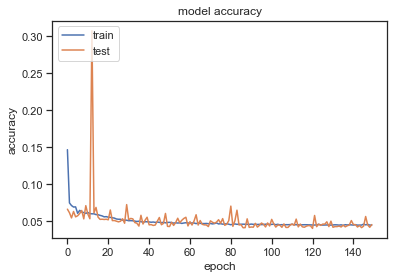

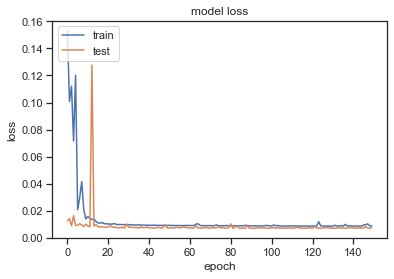

In [206]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()